<a href="https://colab.research.google.com/github/dialuser/dishsocial/blob/master/dishsocialexp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates soical+drought monitor data merging for DISH project
Initial creation date: Aug 6 2020
Author: Alex Sun

In [1]:
!which python #this is the default google version, we'll replace it by Miniconda

/usr/local/bin/python


In [2]:
!echo $PYTHONPATH

/env/python


In [3]:
%env PYTHONPATH=

env: PYTHONPATH=


In [ ]:
#Run the cell below to install miniconda
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX


In [11]:
!which conda # should return /usr/local/bin/conda

/usr/local/bin/conda


In [68]:
!conda --version # should return 4.8.3

conda 4.8.3


In [10]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tk-8.6.10                  |       hbc83047_0         3.2 MB
    wheel-0.34.2               |           py36_0          49 KB
    sqlite-3.32.3              |       h62c20be_0         2.0 MB
    six-1.15.0                 |             py_0          13 KB
    cffi-1.14.0                |   py36he30daa8_1         226 KB
    ca-certificates-2020.6.24  |                0         133 KB
    pysocks-1.7.1              |           py36_0          30 KB
    conda-4.8.3                |           py36_0         3.0 MB
    urllib3-1.25.9             |             py_0          98 KB
    pyopenssl-19.1.0           |             py_1          47 KB
    ruamel_yaml-0.15.87        |   py36h7b6447c_1   

tk-8.6.10            |  3.2 MB | ########## | 100% 
wheel-0.34.2         |   49 KB | ########## | 100% 
sqlite-3.32.3        |  2.0 MB | ########## | 100% 
six-1.15.0           |   13 KB | ########## | 100% 
cffi-1.14.0          |  226 KB | ########## | 100% 
ca-certificates-2020 |  133 KB | ########## | 100% 
pysocks-1.7.1        |   30 KB | ########## | 100% 
conda-4.8.3          |  3.0 MB | ########## | 100% 
urllib3-1.25.9       |   98 KB | ########## | 100% 
pyopenssl-19.1.0     |   47 KB | ########## | 100% 
ruamel_yaml-0.15.87  |  256 KB | ########## | 100% 
readline-8.0         |  428 KB | ########## | 100% 
libedit-3.1.20191231 |  121 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
conda-package-handli |  886 KB | ########## | 100% 
setuptools-49.2.0    |  929 KB | ########## | 100% 
brotlipy-0.7.0       |  348 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
requests-2.24.0      |   54 KB | ########## | 100% 
idna-2.10   

In [13]:
!python --version # now returns [Python 3.6.5 :: Anaconda, Inc.] If this is not the case your install is not right

Python 3.6.10 :: Anaconda, Inc.


In [14]:
!conda install --channel conda-forge tobler #install tobler

Solving environment: \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - tobler


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    beautifulsoup4-4.9.1       |   py36h9f0ad1d_0         163 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    conda-4.8.3                |   py36h9f0ad1d_1         3.0 MB  conda-forge
    fiona-1.8.13               |   py36h70cb5cc_1         956 KB  conda-forge
    gdal-3.0.4                 |  py36hd60729c_10         1.3 MB  conda-forge
    glib-2.65.0        

In [20]:
import sys
!ls /usr/local/lib/python3.6/site-packages
sys.path.insert(0, "/usr/local/lib/python3.6/site-packages/")
sys.path

affine
affine-2.3.0.dist-info
attr
attrs-19.3.0.dist-info
beautifulsoup4-4.9.1.dist-info
brotli
brotlipy-0.7.0-py3.6.egg-info
bs4
certifi
certifi-2020.6.20-py3.6.egg-info
cffi
cffi-1.14.0.dist-info
_cffi_backend.cpython-36m-x86_64-linux-gnu.so
chardet
chardet-3.0.4.dist-info
click
click-7.1.2.dist-info
click_plugins
click_plugins-1.1.1.dist-info
cligj
cligj-0.5.0-py2.7.egg-info
conda
conda-4.8.3-py3.6.egg-info
conda_env
conda_package_handling
conda_package_handling-1.7.0.dist-info
cryptography
cryptography-2.9.2.dist-info
dateutil
easy_install.py
fiona
Fiona-1.8.13-py3.6.egg-info
GDAL-3.0.4-py3.6-linux-x86_64.egg-info
gdalconst.py
gdalnumeric.py
gdal.py
geopandas
geopandas-0.8.1.dist-info
idna
idna-2.10.dist-info
jinja2
Jinja2-2.11.2.dist-info
libpysal
libpysal-4.3.0.dist-info
markupsafe
MarkupSafe-1.1.1.dist-info
munch
munch-2.5.0.dist-info
numpy
numpy-1.19.1.dist-info
ogr.py
OpenSSL
osgeo
osr.py
pandas
pandas-1.1.0.dist-info
patsy
patsy-0.5.1.dist-info
pip
pip-20.1.1-py3.6.egg-info
p

['/usr/local/lib/python3.6/site-packages/',
 '/usr/local/lib/python3.6/site-packages/',
 '/usr/local/lib/python3.6/site-packages/',
 '/usr/local/lib/python3.6/site-packages/',
 '',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [69]:
#install mapclassify
!pip install mapclassify

     |████████████████████████████████| 6.8 MB 15.5 MB/s 
     |████████████████████████████████| 1.6 MB 49.4 MB/s 
     |████████████████████████████████| 300 kB 55.4 MB/s 


In [31]:
!export LD_LIBRARY_PATH=$LD_LIBRARY_PATH:/usr/local/lib
!sudo ldconfig

/sbin/ldconfig.real: /usr/local/lib/python3.6/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [36]:
import tobler
from shapely.geometry import Polygon
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
class DM2Tract():
    """
    Mask drought monitor with census tract 
    """
    def __init__(self, tract_shpfile, dm_shpfile, popcsv):
        """
        @param tract_shpfile, filename of census tract shape layer
        @param dm_shpfile, filename of the weekly drought monitor shpfile
        @param popcsv, csv file corresponding to census ASD
        """
        self.csv_pop = popcsv
        self.tractshpfile = tract_shpfile
        self.dmshpfile = dm_shpfile
        self.joinCol = 'GEOID'
        
        self.loadPopulation()
        self.loadCensusTract()
        self.loadDM()
        
    def loadDM(self):
        self.gdfDM = geopandas.read_file(self.dmshpfile)
        print (self.gdfDM.head())
        print (self.gdfDM.crs)
        
    def loadPopulation(self):        
        colconverter = lambda x: (x[9:])
        self.df = pd.read_csv(self.csv_pop, header=None, skiprows=2, usecols=[0,1,2],
                         names=[self.joinCol,'NAME','POPULATION'], converters={self.joinCol:colconverter})
        print (self.df.head())

    def loadCensusTract(self):        
        self.gdf = geopandas.read_file(self.tractshpfile)
        print (self.gdf.head())
        print (self.gdf.crs)
        #reproject to WGS84
        self.gdf  = self.gdf.to_crs({'init': 'epsg:4326'})
    
    def merge(self):
        popgdf = self.gdf.merge(self.df, left_on='GEOID', right_on=self.joinCol)
        #loop through DM categories
        for idm in range(1,5):
            dm1 = self.gdfDM.loc[self.gdfDM['DM'] == idm]
            if not dm1.empty:
                #get population falling into each drought category
                resgdf = geopandas.overlay(popgdf, dm1, how='intersection')
                if not resgdf.empty:        
                    _,ax=plt.subplots(figsize=(8,8))
                    popgdf.geometry.boundary.plot(color=None,edgecolor='gray',linewidth = 0.5,ax=ax) #Use your s
                    resgdf.plot(column='POPULATION', legend=True, cmap='Purples', scheme='QUANTILES', ax=ax)
                    ax.set_title('Population under DM{0}'.format(idm))
                    plt.show()
                    #plt.savefig('pop_in_dm{0}.png'.format(idm))
                    #plt.close()
        


In [45]:
#download data from github
!git clone https://github.com/dialuser/dishsocial.git

Cloning into 'dishsocial'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 25 (delta 1), reused 25 (delta 1), pack-reused 0
Unpacking objects: 100% (25/25), done.


In [51]:
!ls

dishsocial  Miniconda3-4.5.4-Linux-x86_64.sh  sample_data


In [75]:
dmshp = r'dishsocial/data/USDM_20200623.shp'
popcsv = r'dishsocial/data/ACSDT5Y2018.B01003_data_with_overlays_2020-06-15T120944.csv'
tractshp = r'dishsocial/data/tl_2019_48_tract.shp'
    
dm2tract = DM2Tract(tract_shpfile=tractshp, popcsv=popcsv, dm_shpfile=dmshp)



         GEOID                                            NAME  POPULATION
0  48017950100         Census Tract 9501, Bailey County, Texas        7092
1  48023950300         Census Tract 9503, Baylor County, Texas        3591
2  48079950100        Census Tract 9501, Cochran County, Texas        2904
3  48087950300  Census Tract 9503, Collingsworth County, Texas        2996
4  48095950300         Census Tract 9503, Concho County, Texas        4233
  STATEFP  ...                                           geometry
0      48  ...  POLYGON ((-97.23369 32.67175, -97.23366 32.671...
1      48  ...  POLYGON ((-98.26254 29.57872, -98.26236 29.578...
2      48  ...  POLYGON ((-95.43727 29.98103, -95.43709 29.981...
3      48  ...  POLYGON ((-95.46369 30.00709, -95.45908 30.009...
4      48  ...  POLYGON ((-96.08885 29.60166, -96.08555 29.601...

[5 rows x 13 columns]
epsg:4269


/usr/local/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


   OBJECTID  ...                                           geometry
0         1  ...  MULTIPOLYGON (((-67.19646 18.06634, -67.19460 ...
1         2  ...  MULTIPOLYGON (((-66.52045 17.88969, -66.52909 ...
2         3  ...  MULTIPOLYGON (((-66.05327 18.06583, -66.04573 ...
3         4  ...  MULTIPOLYGON (((-102.48627 32.95412, -102.6793...

[4 rows x 5 columns]
epsg:4326


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326



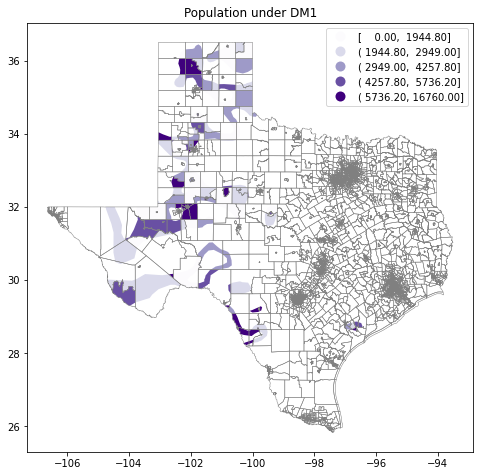

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326



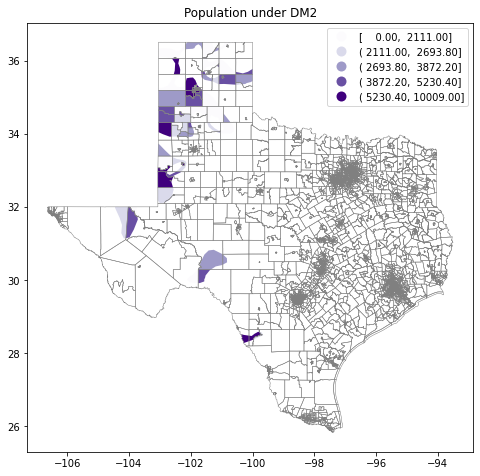

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326



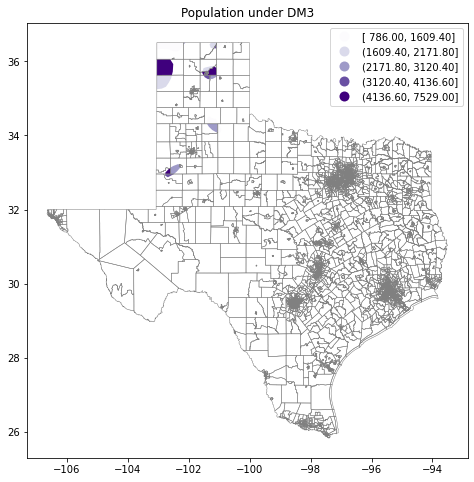

In [76]:
dm2tract.merge()